Phase 5 – Unsupervised Learning

In [1]:
#  Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score


Mounted at /content/drive


In [2]:
#  Loading selected features dataset
data = pd.read_csv("/content/drive/MyDrive/selected_features.csv")

# Separate features and target
X = data.drop(columns=["target"])
y = data["target"]

print("Shape of data:", X.shape)
X.head()


Shape of data: (303, 15)


,thalach,oldpeak,chol,age,trestbps,ca_0.0,cp_4.0,thal_7.0,thal_3.0,exang,slope_1.0,ca_1.0,slope_2.0,sex,ca_2.0
0,0.017197,1.087338,-0.264900,0.948726,0.757525,1.0,0.0,0.0,0.0,-0.696631,0.0,0.0,0.0,0.686202,0.0
1,-1.821905,0.397182,0.760415,1.392002,1.611220,0.0,1.0,0.0,1.0,1.435481,0.0,0.0,1.0,0.686202,0.0
2,-0.902354,1.346147,-0.342283,1.392002,-0.665300,0.0,1.0,1.0,0.0,1.435481,0.0,0.0,1.0,0.686202,1.0
3,1.637359,2.122573,0.063974,-1.932564,-0.096170,1.0,0.0,0.0,1.0,-0.696631,0.0,0.0,0.0,0.686202,0.0
4,0.980537,0.310912,-0.825922,-1.489288,-0.096170,1.0,0.0,0.0,1.0,-0.696631,1.0,0.0,0.0,-1.457296,0.0


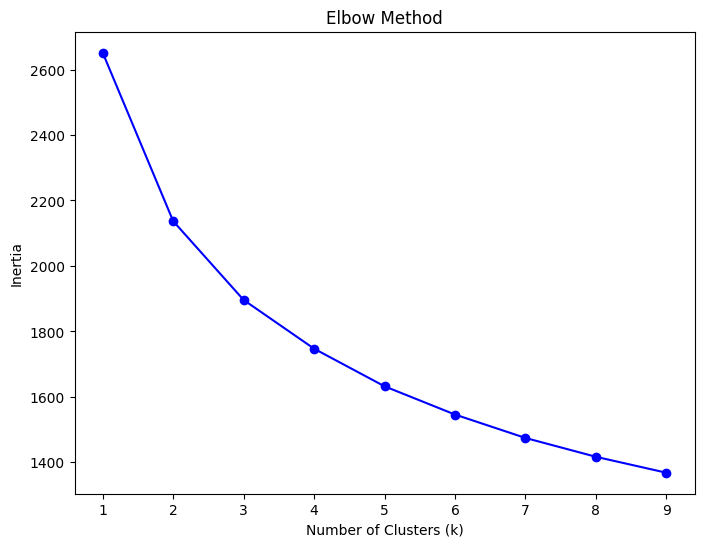

In [3]:
#  Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [4]:
#  Apply KMeans with k=2 (since heart disease is binary)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)
data["cluster"] = clusters


In [5]:
#  Evaluate clustering
sil_score = silhouette_score(X, clusters)
ari_score = adjusted_rand_score(y, clusters)

print("Silhouette Score:", sil_score)
print("Adjusted Rand Index (vs target):", ari_score)


Silhouette Score: 0.19407104915760312
Adjusted Rand Index (vs target): 0.316749980392214


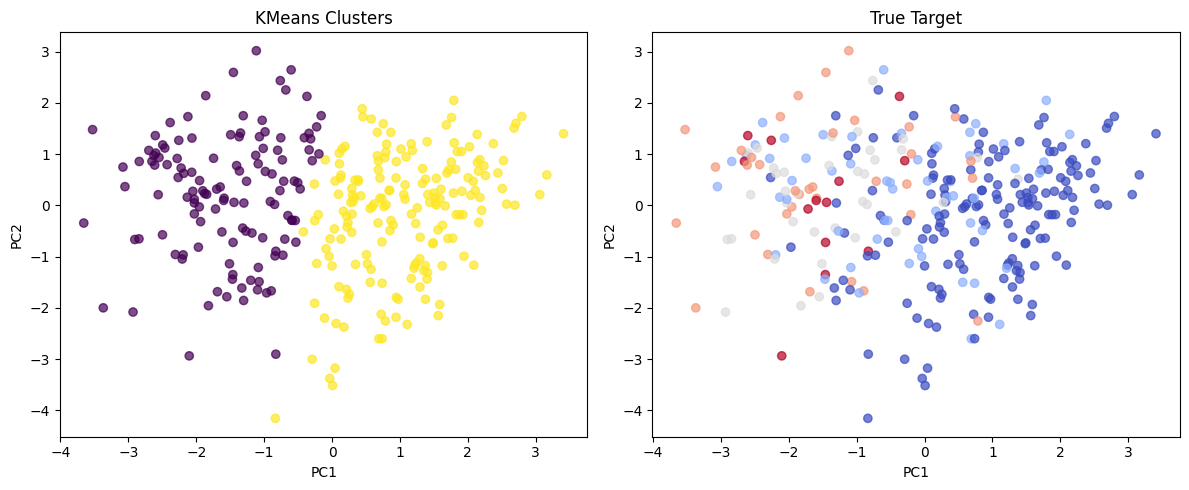

In [6]:
#  Visualize clusters with PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12,5))

# Plot by clusters
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.7)
plt.title("KMeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot by true target
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.title("True Target")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()


In [8]:
#  Save dataset with clusters
data.to_csv("/content/drive/MyDrive/clusters.csv", index=False)
print("✅ clusters.csv saved to data/ folder")


✅ clusters.csv saved to data/ folder
